# Analysez des données de systèmes éducatifs

## Data Processing

This notebook outlines the data processing steps for analyzing the World Bank EdStats dataset. The workflow is divided into three key stages:
1. **Data quality and description**: Assessing the dataset's completeness and structure.
2. **Data cleaning and indicator selection**: Refining the dataset by removing inconsistencies and selecting relevant indicators.
3. **Data organization**: Structuring the cleaned data for analysis.

The output of this notebook includes four cleaned data frames, ready for further analysis.

## Instructions for Use

1. Download the EdStats dataset from the World Bank Data Catalog: [EdStats Dataset](https://datacatalog.worldbank.org/search/dataset/0038480).
2. Update the file paths in the code below to match your local directory structure.

In [2]:
# File paths [update with your file path]
data_path_raw = (
    '/Users/nataschajademinnitt/Documents/5. Data Analysis/'
    'open_classrooms/project_2/data/raw/'
)

data_path_processed = (
    '/Users/nataschajademinnitt/Documents/5. Data Analysis/'
    'open_classrooms/project_2/data/processed/'
)

figures_path = (
    '/Users/nataschajademinnitt/Documents/5. Data Analysis/'
    'open_classrooms/project_2/results/figures/'
)

## Part 1: Dataset Quality and Description

### Load data

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import os
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Set environment
pd.set_option('display.float_format', '{:.1f}'.format)
sns.set_theme(style="whitegrid", context="paper")

#### EdStats metadata

In [7]:
# Checking the file size
file_size_mb = (
    os.path.getsize(data_path_raw + 'Edstats_Updated.csv')
    / (1024 ** 2)
)

print(f"The EdStats file size is approximately {file_size_mb:.2f} MB")

if file_size_mb > 500:
    print("The file should be loaded using a memory efficiency approach.")
else:
    print("The file is small and can be loaded fully.")

The EdStats file size is approximately 692.93 MB
The file should be loaded using a memory efficiency approach.


In [8]:
# Load the EdStats metadata
raw = pd.read_csv(data_path_raw + 'Edstats_Updated.csv', low_memory=False)
raw = raw.dropna(axis=1, how='all')

# Downcasting floats
float_cols = raw.select_dtypes(include=['float64']).columns
raw[float_cols] = raw[float_cols].astype('float32')

# Display
print(raw.info())
raw.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409569 entries, 0 to 1409568
Data columns (total 68 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   INDICATOR            1409569 non-null  object 
 1   name                 1357108 non-null  object 
 2   SEX                  1357108 non-null  object 
 3   URBANIZATION         1357108 non-null  object 
 4   AGE                  1357108 non-null  object 
 5   COMP_BREAKDOWN_1     1357108 non-null  object 
 6   INDICATOR_ROOT       1357108 non-null  object 
 7   UNIT_MEASURE         1357108 non-null  object 
 8   UNIT_TYPE            1357108 non-null  object 
 9   INDICATOR_ROOT_NAME  1357108 non-null  object 
 10  economy              1409569 non-null  object 
 11  Country name         363060 non-null   object 
 12  Indicator name       363060 non-null   object 
 13  YR1970               22483 non-null    float32
 14  YR1971               32445 non-null    float32
 15

,INDICATOR,name,SEX,URBANIZATION,AGE,COMP_BREAKDOWN_1,INDICATOR_ROOT,UNIT_MEASURE,UNIT_TYPE,INDICATOR_ROOT_NAME,...,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023,YR2024
0,HD.HCI.AMRT,Survival Rate from Age 15-60,_T,_T,_T,_Z,HD.HCI.AMRT,NUMBER,NUMBER,Survival Rate from Age 15-60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HD.HCI.AMRT,Survival Rate from Age 15-60,_T,_T,_T,_Z,HD.HCI.AMRT,NUMBER,NUMBER,Survival Rate from Age 15-60,...,NaN,NaN,0.8,0.8,NaN,0.8,NaN,NaN,NaN,NaN
2,HD.HCI.AMRT,Survival Rate from Age 15-60,_T,_T,_T,_Z,HD.HCI.AMRT,NUMBER,NUMBER,Survival Rate from Age 15-60,...,NaN,NaN,0.8,0.7,NaN,0.7,NaN,NaN,NaN,NaN


#### Stats series

In [10]:
raw_series = pd.read_csv(data_path_raw + 'EdStatsSeries.csv', low_memory=True)
raw_series = raw_series.dropna(axis=1, how='all')
print(raw_series.info())
raw_series.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Series Code                          3665 non-null   object
 1   Topic                                3665 non-null   object
 2   Indicator Name                       3665 non-null   object
 3   Short definition                     2156 non-null   object
 4   Long definition                      3665 non-null   object
 5   Periodicity                          99 non-null     object
 6   Base Period                          314 non-null    object
 7   Other notes                          552 non-null    object
 8   Aggregation method                   47 non-null     object
 9   Limitations and exceptions           14 non-null     object
 10  General comments                     14 non-null     object
 11  Source                               3665 n

,Series Code,Topic,Indicator Name,Short definition,Long definition,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,General comments,Source,Statistical concept and methodology,Development relevance,Related source links
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN


#### Edstats country

In [12]:
raw_country = pd.read_csv(data_path_raw + 'EdStatsCountry.csv', low_memory=True)
raw_country = raw_country.dropna(axis=1, how='all')
print(raw_country.info())
raw_country.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005


#### Edstats country-series

In [14]:
raw_country_series = pd.read_csv(data_path_raw + 'EdStatsCountry-Series.csv', low_memory=True)
raw_country_series = raw_country_series.dropna(axis=1, how='all')
print(raw_country_series.info())
raw_country_series.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryCode  613 non-null    object
 1   SeriesCode   613 non-null    object
 2   DESCRIPTION  613 non-null    object
dtypes: object(3)
memory usage: 14.5+ KB
None


,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...


#### Edstats footnote

In [16]:
raw_footnotes = pd.read_csv(data_path_raw + 'EdStatsFootNote.csv', low_memory=True)
raw_footnotes = raw_footnotes.dropna(axis=1, how='all')
print(raw_footnotes.info())
raw_footnotes.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CountryCode  643638 non-null  object
 1   SeriesCode   643638 non-null  object
 2   Year         643638 non-null  object
 3   DESCRIPTION  643638 non-null  object
dtypes: object(4)
memory usage: 19.6+ MB
None


,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.


### Data validation

#### General structure

In [19]:
# Shape of the EdStats dataframe
nRow, nCol = raw.shape
dtype_counts = raw.dtypes.value_counts()
duplicated = raw.duplicated().sum()
indicators = raw['Indicator name'].nunique()
country = raw['Country name'].nunique()

print(f'There are {nRow} rows of which {duplicated} are duplicated.\n')
print(f'There are {nCol} columns which include:\n{dtype_counts}\n')
print(f'There are {indicators} unique indicators and {country} unique countries in the data frame.')

There are 1409569 rows of which 0 are duplicated.

There are 68 columns which include:
float32    54
object     14
Name: count, dtype: int64

There are 4958 unique indicators and 220 unique countries in the data frame.


#### Missing values

Assessing missing values using missingno. The module can comfortably accommodate up to 50 labeled variables for its visualizations. Therefore, the dataframe is subset to include only relevant years, focusing on the 2010 – 2023 to evaluate the feasibility of global expansion.

In [22]:
# Subset the df
df = raw.dropna(subset=['Country name'])
df = df.iloc[:, np.r_[0:1, 11:13, 56:66]]

In [23]:
# Percentage of missing values by year
null_ave = (df.isnull().mean() * 100)
print("Percentage of Missing Values (2013–2022):")
print(null_ave)

Percentage of Missing Values (2013–2022):
INDICATOR         0.0
Country name      0.0
Indicator name    0.0
YR2013           66.4
YR2014           61.8
YR2015           61.4
YR2016           62.1
YR2017           64.1
YR2018           59.1
YR2019           61.2
YR2020           67.1
YR2021           69.8
YR2022           78.9
dtype: float64


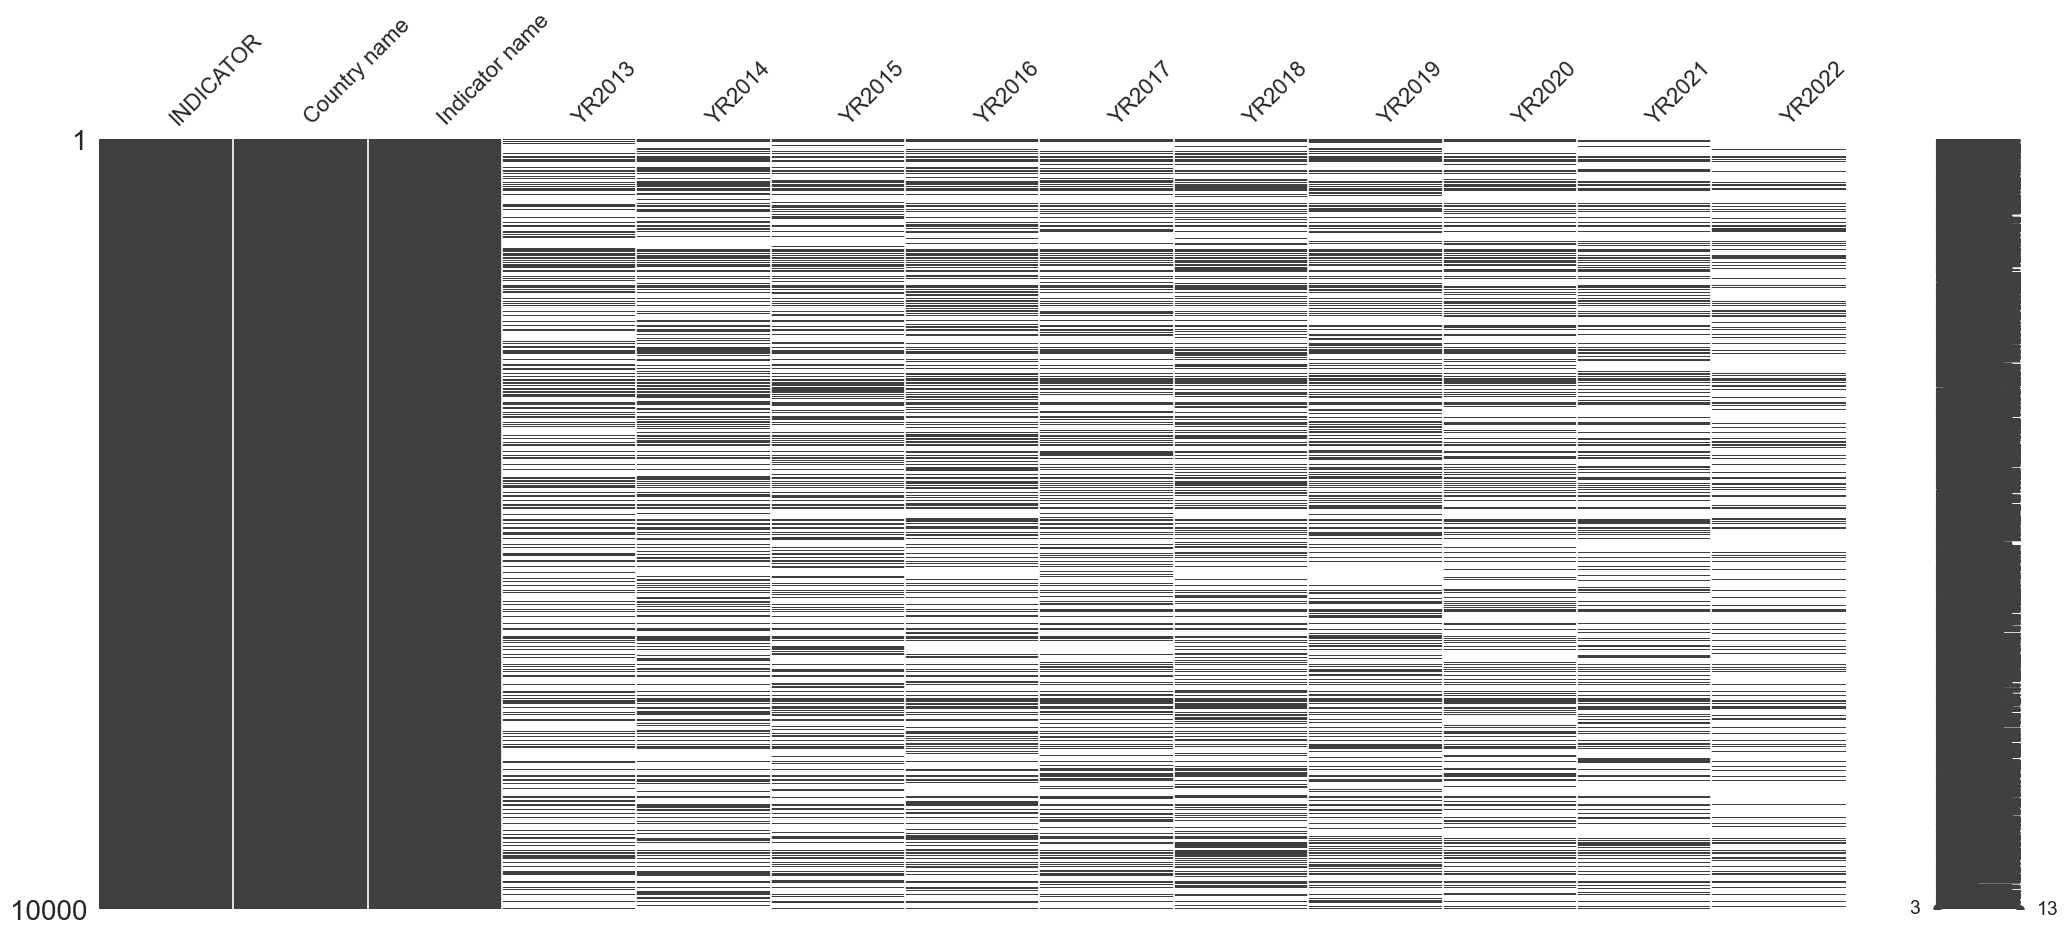

In [24]:
# Nullity matrix
msno.matrix(df.sample(10000))
plt.savefig(figures_path + 'nullity_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

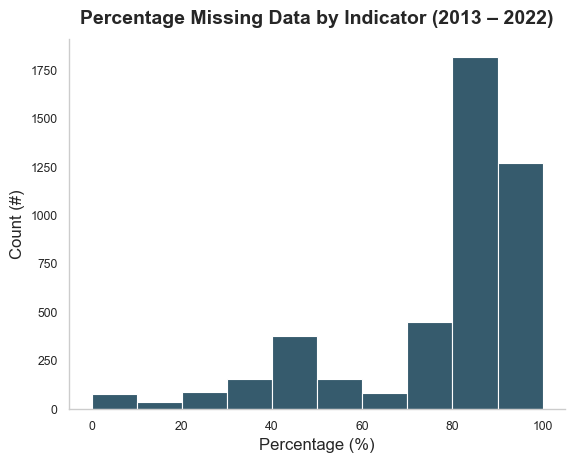

In [25]:
# Missing data percentage by indicator for all relevant years
years = [f'YR{year}' for year in range(2013, 2022)]

df = raw.dropna(subset=['Country name'])

df = df.set_index(['INDICATOR', 'Country name'])

hist = df[years].isna().reset_index() # creates a boolean (true for missing)

hist = (
    hist.groupby('INDICATOR')[years].sum().sum(axis=1) / # number of true values for each year
    hist.groupby('INDICATOR')[years].count().sum(axis=1) # number of possible values for each year
) * 100

# Plot and save
hist.sort_values().hist(color='#365b6d')
plt.grid(False)
plt.title("Percentage Missing Data by Indicator (2013 – 2022)", fontsize=14, weight='bold', y=1.02)
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Count (#)", fontsize=12)
sns.despine(top=True, right=True)
plt.savefig(figures_path + 'percentage_missing_indicators.png', dpi=300)
plt.show()

In [26]:
# Calculate the percentage of missing values by indicator
missing_percentages = (
    df[years].isna().groupby('INDICATOR').sum().sum(axis=1) /
    df[years].groupby('INDICATOR').count().sum(axis=1)
) * 100

count = (missing_percentages > 80).sum()
percenatge = (count / indicators * 100).round(1)

print(f"Number of indicators with missing data greater than 80%: {count}")
print(f"Percentage of total indicators with missing data greater than 80%: {percenatge}")

Number of indicators with missing data greater than 80%: 3862
Percentage of total indicators with missing data greater than 80%: 77.9


## Part 2: Data Cleaning and Indicator Selection

The following assumptions were made to subset the dataframe:
1. Temporal scope of 10 years (2013 – 2022), excluding 2023 as it only has 6% data availability
2. Target countries include high income countries (names contain OECD or non-OECD in the raw_country dataset)
3. Target countries should have a secondary and tertiary education population greater than 1 million

Data cleaning after subsetting
1. Standardize column names
2. Remove indicators with more than 40% missing data
3. Remove disaggregations of sex (male or female) and geographic location (rural or urban)
4. Only include comparable unit measures (% or ratio)

#### Subsetting the dataframe

In [30]:
# Subset years (2013 – 2022)
df_subset = raw.dropna(subset=['Country name'])
df_subset = df_subset.iloc[:, np.r_[0:1, 7:8, 11:13, 56:66]]

# Clean column names
df_subset.columns = df_subset.columns.str.replace('^YR', '', regex=True)

df_subset.rename(columns={'INDICATOR': 'indicator',
                   'Country name': 'country',
                   'Indicator name': 'indicator_name',
                   'UNIT_MEASURE': 'unit_measure'}, inplace=True)

In [31]:
# Remove low and middle-income countries
countries = raw_country[
            raw_country['Income Group'].str.contains('OECD',
                                                     case=False, na=False)
]

countries = countries['Short Name'].tolist()

df_subset = df_subset[df_subset['country'].isin(countries)]

In [32]:
# Filter for secondary and tertiary education population
df_mean = df_subset[
    df_subset['indicator'].str.contains(r'SP.SEC.TOTL.IN|SP.TER.TOTL.IN', # indicators for population count (secondary + tertiary)
                                 case=False, na=False)].copy()

# Aggregate mean across years
df_mean.loc[:, 'mean'] = df_mean.loc[:, '2013':'2022'].mean(axis=1)

# Group by country and aggregate the mean for both indicators
df_mean = (
    df_mean.groupby('country')['mean']
    .mean()
    .reset_index()
)

# Drop countries with tertiary population smaller than 1 million
countries = df_mean[df_mean['mean'] >= 1000000]

countries = countries['country'].tolist()

df_subset = df_subset[df_subset['country'].isin(countries)]

#### Removing missing values

In [34]:
# Calculate the percentage of missing values per indicator
years = [str(year) for year in range(2013, 2023)]

indic = df_subset.set_index(['indicator', 'country'])[years].isna().reset_index()

indic = (
    indic.groupby('indicator')[years].sum().sum(axis=1) /
    indic.groupby('indicator')[years].count().sum(axis=1)
) * 100

# Remove indicators with more than 40% missing data
indic = indic[indic < 40].index

df_missing = df_subset.loc[df_subset['indicator'].isin(indic)]

# Check for missing values
null_ave = (df_missing.isnull().mean() * 100).round(2)
print("Percentage of Missing Values (2013–2022):")
print(null_ave)

Percentage of Missing Values (2013–2022):
indicator         0.0
unit_measure     37.0
country           0.0
indicator_name    0.0
2013             13.7
2014             14.6
2015             11.6
2016             10.1
2017              7.0
2018              6.7
2019             10.1
2020              8.9
2021             19.0
2022             53.6
dtype: float64


#### Removing disaggrigations

In [36]:
# Removing unit, location and sex disaggrigations
df_drop = (
    df_missing
    .loc[~df_missing['indicator'].str.contains(r'\.M$|\.F$|\.RUR|\.URB', # remove male, female, rural, urban
                                       case=False, na=False)]
    .loc[df_missing['unit_measure'].isin(['SHARE'])]  # keep comparable unit measures (share of)
)

In [37]:
# Additional subsetting for words or categories that are not relevant
df_drop = df_drop.loc[
    ~df_drop['indicator_name'].str.contains(
        r'female|' 
        r'male|'
        r'bound|'
        r'primary|'
        r'early childhood|'
        r'lower|'
        r'parity|'
        r'Grade [1-7]|'
        r'teacher|'
        r'Initial government|'
        r'Doctoral|'
        r'post-secondary|'
        r'Master|'
        r'number|'
        r'proportion of|'
        r'entrance age|'
        r'life expectancy|'
        r'Out-of-school|'
        r'current|'
        r'staff|'
        r'graduates from',
        case=False,
        na=False
    )
]

print(f"The number of remaining indicators in the dataframe is: {df_drop['indicator_name'].nunique()}")

The number of remaining indicators in the dataframe is: 27


#### Indicator selection

In [39]:
# Filter rows for indicators of interest
selected_indicators = [
    # Enrolment ratio (% age group)
    'Gross enrolment ratio, upper secondary, both sexes (%)',
    'Gross enrolment ratio for tertiary education, both sexes (%)',
    # Enrolment ratio (% private / public)
    'Percentage of enrolment in secondary education in private institutions (%)',
    'Percentage of enrolment in tertiary education in private institutions (%)',
    # Enrolment program type (% general/vocational)
    'Share of all students in upper secondary education enrolled in general programmes (%)',
    'Share of all students in upper secondary education enrolled in vocational programmes (%)',
    # Educational attainment (% enrolled)
    'Educational attainment rate, completed upper secondary education or higher, population 25+ years, both sexes (%)',
    'Educational attainment rate, completed short-cycle tertiary education or higher, population 25+ years, both sexes (%)',
    "Educational attainment rate, completed Bachelor's or equivalent education or higher, population 25+ years, both sexes (%)",
    # Government expenditure (% of GDP)
    'Government expenditure on upper secondary education as a percentage of GDP (%)',
    'Government expenditure on tertiary education as a percentage of GDP (%)',
    # Government expenditure (% of budget)
    'Expenditure on education as a percentage of total government expenditure (%)',
    # Household funding (% GDP per capita)
    'Initial household funding per tertiary student as a percentage of GDP per capita',
]

df_indicator = df_drop[df_drop['indicator_name'].isin(selected_indicators)]

# Sorting the selected indicators
df_indicator = df_indicator.copy()
df_indicator['indicator_name'] = pd.Categorical(
    df_indicator['indicator_name'], 
    categories=selected_indicators, 
    ordered=True
)

print(f"The number of remaining indicators in the dataframe is: {df_indicator['indicator_name'].nunique()}")

The number of remaining indicators in the dataframe is: 13


In [40]:
# Shortening the indicator names
short_names = {
    'Gross enrolment ratio, upper secondary, both sexes (%)': 'Gross enrolment, upper secondary',
    'Gross enrolment ratio for tertiary education, both sexes (%)': 'Gross enrolment, tertiary',
    'Percentage of enrolment in secondary education in private institutions (%)': 'Private enrolment, secondary',
    'Percentage of enrolment in tertiary education in private institutions (%)': 'Private enrolment, tertiary',
    'Share of all students in upper secondary education enrolled in general programmes (%)': 'General programme share, upper secondary',
    'Share of all students in upper secondary education enrolled in vocational programmes (%)': 'Vocational programme share, upper secondary',
    'Educational attainment rate, completed upper secondary education or higher, population 25+ years, both sexes (%)': 'Attainment, upper secondary (25+)',
    'Educational attainment rate, completed short-cycle tertiary education or higher, population 25+ years, both sexes (%)': 'Attainment, short-cycle tertiary (25+)',
    "Educational attainment rate, completed Bachelor's or equivalent education or higher, population 25+ years, both sexes (%)": "Attainment, Bachelor's or higher (25+)",
    'Government expenditure on upper secondary education as a percentage of GDP (%)': 'Govt expenditure, upper secondary (% GDP)',
    'Government expenditure on tertiary education as a percentage of GDP (%)': 'Govt expenditure, tertiary (% GDP)',
    'Expenditure on education as a percentage of total government expenditure (%)': 'Education expenditure (% of govt)',
    'Initial household funding per tertiary student as a percentage of GDP per capita': 'Household funding, tertiary (% GDP/capita)',
}

df_indicator.loc[:, ['indicator_name']] = df_indicator['indicator_name'].map(short_names)

In [41]:
# Adding a theme column for indicators
themes = {
        'Gross enrolment, upper secondary': 'Enrolment',
        'Gross enrolment, tertiary': 'Enrolment',
        'Private enrolment, secondary': 'Enrolment',
        'Private enrolment, tertiary': 'Enrolment',
        'General programme share, upper secondary': 'Enrolment',
        'Vocational programme share, upper secondary': 'Enrolment',
        'Attainment, upper secondary (25+)': 'Attainment',
        'Attainment, short-cycle tertiary (25+)': 'Attainment',
        "Attainment, Bachelor's or higher (25+)": 'Attainment',
        'Govt expenditure, upper secondary (% GDP)': 'Expenditure',
        'Govt expenditure, tertiary (% GDP)': 'Expenditure',
        'Education expenditure (% of govt)': 'Expenditure',
        'Household funding, tertiary (% GDP/capita)': 'Expenditure'
}

df_indicator['theme'] = df_indicator['indicator_name'].map(themes)

#### Cleaned dataframe

In [43]:
df_clean = df_indicator.reset_index(drop=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   indicator       164 non-null    object  
 1   unit_measure    164 non-null    object  
 2   country         164 non-null    object  
 3   indicator_name  164 non-null    category
 4   2013            137 non-null    float32 
 5   2014            134 non-null    float32 
 6   2015            149 non-null    float32 
 7   2016            148 non-null    float32 
 8   2017            153 non-null    float32 
 9   2018            152 non-null    float32 
 10  2019            149 non-null    float32 
 11  2020            159 non-null    float32 
 12  2021            121 non-null    float32 
 13  2022            75 non-null     float32 
 14  theme           164 non-null    object  
dtypes: category(1), float32(10), object(4)
memory usage: 12.5+ KB


## Part 3: Data Organization

### Aggregate across years

In [46]:
# Removing rows with > 80% NaN
df_agg = df_clean.copy()
df_agg['na_count'] = df_agg.loc[:, '2013':'2022'].isna().sum(axis=1)
df_agg = df_agg[df_agg['na_count'] < 8]

In [47]:
# Calculate the coefficient of variation
df_agg['cv'] = df_agg.loc[:, '2013':'2022'].std(axis=1) / df_agg.loc[:, '2013':'2022'].mean(axis=1)

# Count rows with more than 20% variation
num_rows = df_agg[df_agg['cv'] >= 0.2].shape[0]
print(f"Number of rows with more than 20% variation: {num_rows}")

Number of rows with more than 20% variation: 14


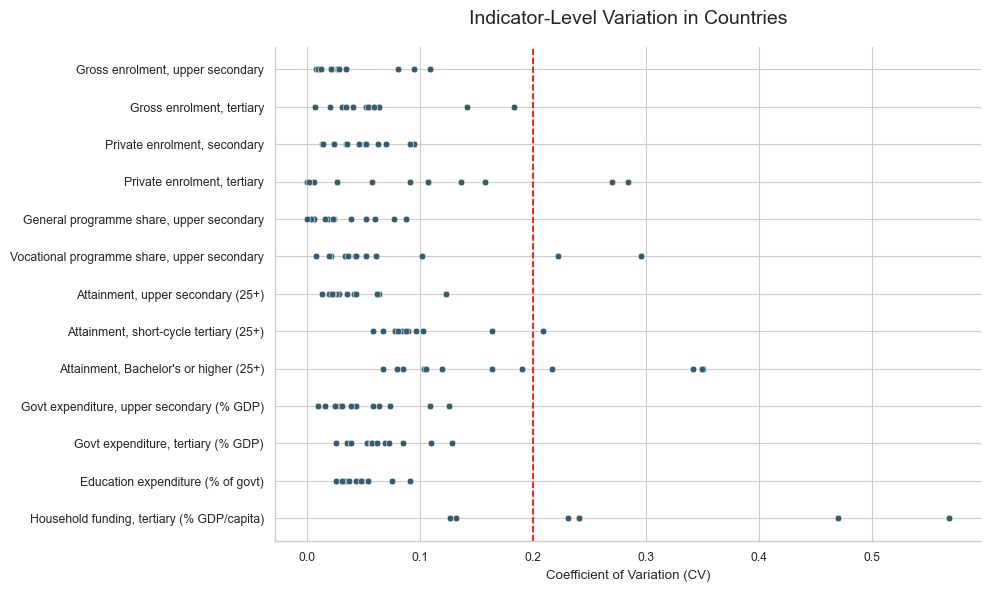

In [48]:
# Indicator-level variation year-on-year for each country
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_agg, x='cv', y='indicator_name', color='#365b6d')
plt.axvline(0.2, color='red', linestyle='--')

plt.title('Indicator-Level Variation in Countries', fontsize=14, y=1.03)
plt.ylabel('')
plt.xlabel('Coefficient of Variation (CV)')

sns.despine(top=True, right=True)
plt.tight_layout()
plt.savefig(figures_path + 'indicator_cv.png', dpi=300)
plt.show()

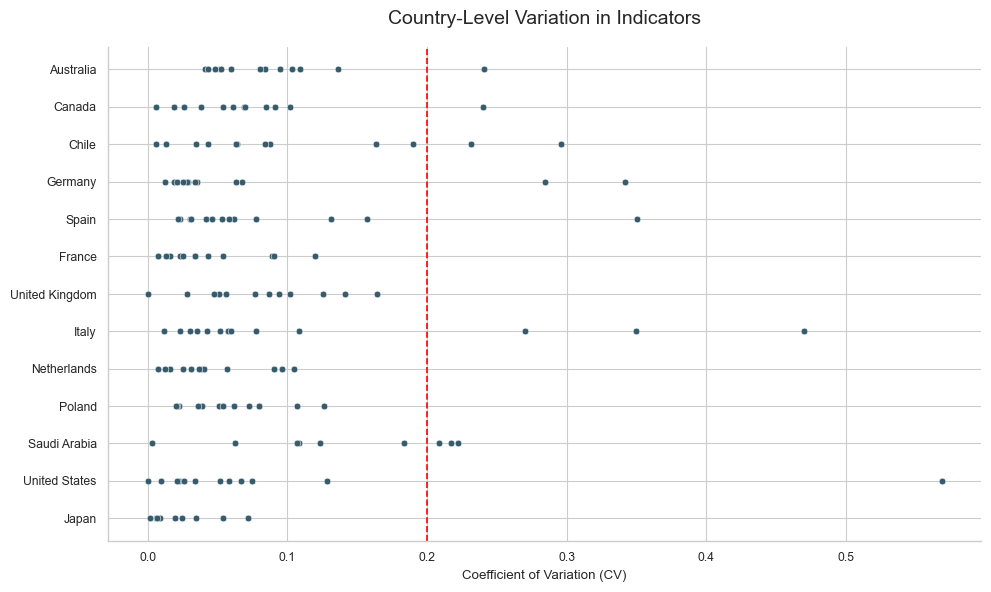

In [49]:
# Country-level variation year-on-year for each indicator
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_agg, x='cv', y='country', color='#365b6d')
plt.axvline(0.2, color='red', linestyle='--')

plt.title('Country-Level Variation in Indicators', fontsize=14, y=1.03)
plt.ylabel('')
plt.xlabel('Coefficient of Variation (CV)')

sns.despine(top=True, right=True)
plt.tight_layout()
plt.savefig(figures_path + 'country_cv.png', dpi=300)
plt.show()

Interpretation:
Countries with most of their points to the left of the dashed line show relatively consistent indicator values year-on-year.
Countries with points on the right of the dashed line suggest high variability for specific indicators.

For indicators with more than 20% variation, the median is used to compute the average across the years.

In [51]:
# Compute the mean or median depending on cv score
df_agg.loc[:, 'mean'] = np.where(
    df_agg['cv'] <= 0.2, # less than 20% variation
    df_agg.loc[:, '2013':'2022'].mean(axis=1),
    df_agg.loc[:, '2013':'2022'].median(axis=1)
)

In [52]:
# Calculate the most recent score
df_agg['recent'] = df_agg.loc[:, '2013':'2022'].apply(
    lambda row: row.dropna().iloc[-1], axis=1)

In [53]:
# Difference between claculated mean and recent scores
df_agg.loc[:, 'diff_percent'] = ((df_agg['recent'] -
                                  df_agg['mean']) /
                                 df_agg['mean']) * 100

check = df_agg[df_agg['diff_percent'].abs() > 20]
check = check.shape[0]
print(f"Number of rows with more than 20% variation between the mean and most recent value: {check}")

Number of rows with more than 20% variation between the mean and most recent value: 18


In [54]:
df_agg = df_agg.drop(columns=['na_count', 'unit_measure', 'cv', 'diff_percent'])

### Transform data

In [56]:
# DF with country and mean for year
df_short_mean = df_agg.pivot_table(
    index='country',
    columns='indicator_name',
    values='mean',
    aggfunc='mean'
)

df_short_mean.columns.name = None
df_short_mean.reset_index(inplace=True)

df_short_mean

,country,"Gross enrolment, upper secondary","Gross enrolment, tertiary","Private enrolment, secondary","Private enrolment, tertiary","General programme share, upper secondary","Vocational programme share, upper secondary","Attainment, upper secondary (25+)","Attainment, short-cycle tertiary (25+)","Attainment, Bachelor's or higher (25+)","Govt expenditure, upper secondary (% GDP)","Govt expenditure, tertiary (% GDP)",Education expenditure (% of govt),"Household funding, tertiary (% GDP/capita)"
0,Australia,202.3,111.4,45.2,20.0,46.4,53.6,77.5,43.1,31.9,0.6,1.3,14.7,7.4
1,Canada,117.9,70.5,8.1,NaN,91.4,8.6,86.4,60.2,28.2,1.3,1.6,12.2,5.2
2,Chile,102.0,89.7,61.9,84.1,77.2,22.3,61.5,17.7,15.7,1.0,1.3,20.5,14.7
3,France,107.7,65.8,25.5,22.6,59.4,40.6,71.2,31.4,19.4,1.1,1.2,9.4,NaN
4,Germany,103.0,69.0,9.5,10.0,52.8,47.2,82.7,27.1,25.7,0.8,1.3,9.5,NaN
5,Italy,99.6,64.1,7.0,12.1,45.2,54.8,50.9,15.4,15.8,1.1,0.8,7.9,2.7
6,Japan,102.4,62.6,20.5,78.9,77.6,22.4,NaN,NaN,NaN,0.7,0.7,8.1,NaN
7,Netherlands,133.3,83.5,6.4,15.8,32.0,68.0,71.3,33.6,31.5,1.0,1.7,11.7,NaN
8,Poland,116.3,71.1,10.9,28.2,48.3,51.7,85.7,26.2,26.0,0.8,1.1,11.9,2.1
9,Saudi Arabia,105.3,66.5,14.3,5.3,98.6,1.5,55.0,31.5,26.0,NaN,NaN,NaN,NaN


In [57]:
# DF with country and recent year
df_short_recent = df_agg.pivot_table(
    index='country',
    columns='indicator_name',
    values='recent',
    aggfunc='mean'
)

df_short_recent.columns.name = None
df_short_recent.reset_index(inplace=True)

df_short_recent

,country,"Gross enrolment, upper secondary","Gross enrolment, tertiary","Private enrolment, secondary","Private enrolment, tertiary","General programme share, upper secondary","Vocational programme share, upper secondary","Attainment, upper secondary (25+)","Attainment, short-cycle tertiary (25+)","Attainment, Bachelor's or higher (25+)","Govt expenditure, upper secondary (% GDP)","Govt expenditure, tertiary (% GDP)",Education expenditure (% of govt),"Household funding, tertiary (% GDP/capita)"
0,Australia,185.2,106.2,47.5,22.7,47.7,52.3,81.7,48.7,36.8,0.7,1.2,13.9,9.0
1,Canada,114.9,77.8,8.7,NaN,90.4,9.6,89.2,67.3,32.4,1.2,1.6,11.1,5.1
2,Chile,106.3,99.3,62.8,83.6,83.6,16.4,66.6,20.3,20.3,1.0,1.4,19.4,19.7
3,France,109.0,70.8,25.9,25.6,59.4,40.6,74.4,35.0,22.6,1.2,1.3,8.9,NaN
4,Germany,103.6,75.7,10.0,16.1,52.8,47.2,80.8,29.9,29.2,0.9,1.4,9.2,NaN
5,Italy,102.0,71.3,7.2,18.6,48.1,51.9,52.8,16.6,16.5,1.2,0.9,7.4,2.5
6,Japan,103.3,63.2,21.6,79.1,78.2,21.8,NaN,NaN,NaN,0.7,0.7,7.4,NaN
7,Netherlands,135.7,89.0,6.7,15.5,31.3,68.7,74.1,38.8,36.6,1.0,1.7,11.0,NaN
8,Poland,112.4,74.0,10.3,34.2,45.6,54.4,88.2,28.8,28.6,0.8,1.1,11.2,2.5
9,Saudi Arabia,133.4,73.7,13.0,6.6,99.4,0.6,62.3,37.9,31.1,NaN,NaN,NaN,NaN


In [58]:
# DF with country and year
year = df_agg.loc[:, '2013':'2022'].columns #columns to melt vertically

df_long = df_agg.melt(
    id_vars=['country', 'indicator_name'],
    value_vars= year,
    var_name='year',
    value_name='value'
)

df_long = df_long.set_index(['country', 'year'])

df_long = df_long.pivot(columns='indicator_name', values='value')

df_long.columns.name = None

df_long.reset_index(inplace=True)

df_long

,country,year,"Gross enrolment, upper secondary","Gross enrolment, tertiary","Private enrolment, secondary","Private enrolment, tertiary","General programme share, upper secondary","Vocational programme share, upper secondary","Attainment, upper secondary (25+)","Attainment, short-cycle tertiary (25+)","Attainment, Bachelor's or higher (25+)","Govt expenditure, upper secondary (% GDP)","Govt expenditure, tertiary (% GDP)",Education expenditure (% of govt),"Household funding, tertiary (% GDP/capita)"
0,Australia,2013,NaN,NaN,NaN,NaN,NaN,NaN,72.0,37.2,26.7,0.7,1.4,15.6,4.6
1,Australia,2014,NaN,NaN,NaN,NaN,NaN,NaN,73.6,39.5,28.6,0.7,1.4,15.0,6.5
2,Australia,2015,225.9,119.7,41.1,17.7,42.2,57.8,75.5,40.4,29.8,0.6,1.5,14.9,6.3
3,Australia,2016,219.6,119.7,40.5,17.6,44.0,56.0,76.4,41.4,30.0,0.6,1.4,14.9,5.8
4,Australia,2017,213.5,110.0,40.6,15.5,45.0,55.0,77.3,42.6,31.4,0.6,1.3,14.8,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,United States,2018,96.5,88.3,8.9,26.3,100.0,NaN,89.8,45.2,35.0,0.9,1.3,15.8,13.3
126,United States,2019,97.8,87.9,8.9,26.0,NaN,NaN,94.7,46.3,36.1,0.9,1.4,15.5,11.2
127,United States,2020,98.1,87.6,8.5,26.7,100.0,0.0,90.9,48.1,37.5,0.9,1.8,12.7,3.3
128,United States,2021,99.3,84.9,9.2,27.6,100.0,0.0,91.3,47.9,35.0,NaN,NaN,NaN,NaN


### Export

In [60]:
df_agg.to_csv(data_path_processed + 'processed_df.csv', index=False)
df_short_mean.to_csv(data_path_processed + 'df_short_mean.csv', index=False)
df_short_recent.to_csv(data_path_processed + 'df_short_recent.csv', index=False)
df_long.to_csv(data_path_processed + 'df_long.csv', index=False)